In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [111]:
names = ['classes','content']

In [112]:
dataset= pd.read_csv(r'/content/gdrive/MyDrive/NLP/train.csv', names=names)
dataset

,classes,content
0,0,máy dùng hay bị đơ máy
1,0,chỉ có dây cáp nguồn không có adapter sao sử d...
2,0,Chất lượng quá kém Mới dùng được 2 ngày loa ba...
3,0,Usb tôi vừa mới nhận usb này Rất bực bội vì cá...
4,2,Tuyệt vời. Hàng FPT cửa hàng
...,...,...
3035,0,không có bộ thu đi kèm Vừa nhận hàng xong tức ...
3036,0,Cũng bình thường Không mạnh như kỹ vọng Chắc t...
3037,2,tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3038,0,giao hàng lâu rửa tay một tí đã cháy màn hình ...


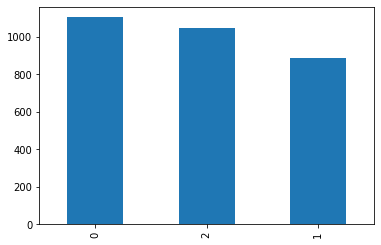

In [113]:
dataset['classes'].value_counts().plot.bar()

In [114]:
import string
def clean_text(text):
  # remove puncuation (loại bỏ các dấu)
  text = text.translate(string.punctuation)

  ## convert words to lower case and split them
  text = text.lower().split()
  text = " ".join(text)
  return text

In [115]:
dataset['content'] = dataset['content'].map(lambda x: clean_text(x))


In [116]:
dataset['content'].head(10)

0                               máy dùng hay bị đơ máy
1    chỉ có dây cáp nguồn không có adapter sao sử d...
2    chất lượng quá kém mới dùng được 2 ngày loa ba...
3    usb tôi vừa mới nhận usb này rất bực bội vì cá...
4                         tuyệt vời. hàng fpt cửa hàng
5    chưa đo đúng bước chân rõ nhiều khi gián đoạn ...
6         phủ sóng thấp quá đi khoảng 3 4m là mất sóng
7    kết nối tốt mối nối không khít gây đau tai 1 k...
8    2 loa nhỏ nghe bị rè âm thanh chưa tốt hơi thấ...
9                      đặt i12 shop giao i11 thất vọng
Name: content, dtype: object

In [117]:
!pip install underthesea

In [118]:
from underthesea import word_tokenize
original_stopwords = ['tiki']
def create_stopwords(path):
  with open(path, encoding='utf-8') as words:
    return [w[:len(w) - 1] for w in words] + original_stopwords
stopwords = create_stopwords('/content/gdrive/MyDrive/NLP/BT_TH_1/vietnamese-stopwords.txt')

In [119]:
def word_processing(sentence):
  sentence = [word for word in word_tokenize(sentence.lower(), format='text').split() if word not in stopwords]
  return [word for word in sentence if word != ""]

In [120]:
input_sentences = [word_processing(str(sentence)) for sentence in dataset['content'].values.tolist()]

In [121]:
input_sentences[:10]

[['máy', 'đơ', 'máy'],
 ['dây_cáp',
  'adapter',
  'sử_dụng',
  'dây_cáp',
  'adapter',
  'sử_dụng',
  'hàng',
  'training',
  'kì_cục'],
 ['chất_lượng',
  'kém',
  '2',
  'loa',
  'bass',
  'âm_thanh',
  'rè_rè',
  'tin_tưởng',
  'chất_lượng'],
 ['usb',
  'vừa_mới',
  'usb',
  'bực_bội',
  'nắp',
  'usb',
  'cứng',
  'không_thể',
  'hộp',
  'đựng',
  'usb',
  'dường_như',
  'cắt'],
 ['tuyệt_vời', '.', 'hàng', 'fpt', 'cửa_hàng'],
 ['đo',
  'chân',
  'gián_đoạn',
  'hài_lòng',
  'hàng_không',
  'tiếng',
  'việt',
  'tìm_hiểu',
  'hoạt_động',
  'máy'],
 ['phủ_sóng', 'đi', '3', '4', 'sóng'],
 ['kết_nối',
  'tốt_mối',
  'nối',
  'khít',
  'đau',
  'tai',
  '1',
  'kết_nối',
  ':',
  'vấn_đề',
  'kết_nối',
  'tiện_dụng',
  '2',
  'nối',
  ':',
  '1',
  'trường_hợp',
  'nối',
  'khớp',
  'một_số',
  'đeo',
  'hơi_hơi',
  'khó_chịu',
  'đeo',
  'đau',
  'tai',
  'cực',
  'ban_đầu',
  'vấn_đề',
  'liên_hệ',
  'đổi',
  'bây_giờ',
  'cơ_hội',
  'tai',
  'vỡ',
  'trời',
  'vực',
  'nối',
  'liền'

In [122]:
word2id = dict()
max_words = 0 # maximum numbẻ of words in a sentence

for sentence in input_sentences:
  for word in sentence:
    if word not in word2id:
      word2id[word] = len(word2id)
  if len(sentence) > max_words:
    max_words = len(sentence)
  
  # Construction of label2id and id2label dicts

  id2word = {v: k for k,v in word2id.items()}



In [123]:
print(max_words)
print(id2word[5])
print('Vocab_size: ',len(id2word))

147
hàng
Vocab_size:  3952


In [124]:
# kiểm tra số lượng từ trong 1 câu
check_len =[]
for sentence in input_sentences:
  check_len.append(len(sentence))
print(check_len)

[3, 9, 9, 13, 5, 10, 5, 51, 14, 4, 4, 4, 10, 2, 22, 10, 7, 15, 36, 10, 19, 4, 21, 13, 11, 3, 8, 16, 4, 1, 9, 8, 3, 8, 10, 7, 11, 27, 30, 15, 8, 13, 3, 4, 17, 7, 23, 3, 18, 13, 13, 15, 8, 5, 21, 7, 58, 8, 8, 10, 5, 11, 15, 9, 21, 11, 14, 9, 5, 33, 2, 16, 5, 8, 12, 1, 19, 18, 40, 13, 1, 14, 24, 11, 18, 5, 2, 7, 4, 50, 11, 31, 22, 4, 4, 16, 8, 10, 5, 10, 28, 41, 8, 23, 8, 28, 39, 12, 9, 4, 15, 6, 6, 8, 29, 9, 14, 12, 12, 12, 4, 16, 7, 0, 12, 3, 2, 13, 1, 15, 6, 10, 16, 30, 4, 25, 3, 9, 7, 11, 23, 21, 31, 19, 40, 17, 4, 14, 28, 13, 5, 15, 5, 20, 3, 7, 24, 12, 20, 22, 5, 12, 18, 96, 6, 48, 23, 19, 12, 7, 11, 26, 23, 2, 9, 12, 17, 10, 27, 8, 23, 6, 7, 2, 15, 7, 25, 13, 24, 12, 11, 2, 23, 7, 17, 2, 12, 9, 9, 18, 10, 6, 16, 10, 1, 15, 13, 9, 5, 2, 11, 3, 10, 6, 4, 9, 2, 8, 8, 13, 4, 3, 20, 21, 8, 3, 11, 7, 13, 13, 5, 58, 7, 22, 8, 15, 2, 13, 13, 11, 30, 11, 12, 5, 14, 7, 7, 16, 56, 4, 4, 45, 9, 12, 4, 10, 6, 39, 11, 20, 7, 10, 9, 21, 25, 13, 9, 54, 20, 11, 8, 3, 3, 22, 6, 7, 4, 14, 15, 5, 5, 9

In [125]:
# tạo các nhóm len sequence
df = pd.DataFrame(check_len, columns=['len_sen'])
df.loc[(df['len_sen']>=0) & ( df['len_sen']<50),'len_group']='1'
df.loc[(df['len_sen']>=50) & ( df['len_sen']<100),'len_group']='2'
df.loc[(df['len_sen']>=100) & ( df['len_sen']<150),'len_group']='3'

In [126]:
df['len_group'].value_counts()

1    2964
2      66
3      10
Name: len_group, dtype: int64

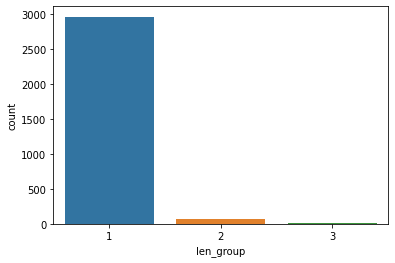

In [127]:
# vẽ so sánh len sequence
import seaborn as sns
# import matplotlib.pyplot as plt
sns.countplot(x='len_group', data=df)

In [129]:
# loại bỏ group 3 trong input_sentences và data
for index,sentence in enumerate(input_sentences):
  if len(sentence) >=100:
    input_sentences.remove(input_sentences[index])
    dataset.drop(index=index, axis=0,inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [131]:
# kiểm tra từ lớn nhất
max2 =0
for sentence in input_sentences:
  if len(sentence) > max2:
    max2 = len(sentence)
print(max2)

97


# bắt đầu xây dựng đầu vào

In [132]:
from tensorflow import keras
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences
X = [[word2id[word] for word in sentence] for sentence in input_sentences] 
X = pad_sequences(X, max2)
Y = dataset.classes
le = preprocessing.LabelEncoder()

Y_train = keras.utils.to_categorical(Y, num_classes=3)


In [133]:
print(X.shape)
print(Y.shape)

(3030, 97)
(3030,)


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y_train, test_size= 0.2, random_state=0)


In [135]:
print(X_train[2])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 179 114 638 254 166 182 639 484  42
 253 640 641 642 643  96 209]


In [147]:
from gensim.models import KeyedVectors
word_2_vec_model_path = '/content/gdrive/MyDrive/NLP/BT_TH_1/baomoi.vn.model.bin'
embedding_index = KeyedVectors.load_word2vec_format(word_2_vec_model_path, binary=True) # dạng bin nên format binary true

In [142]:
print(word2id)

{'máy': 0, 'đơ': 1, 'dây_cáp': 2, 'adapter': 3, 'sử_dụng': 4, 'hàng': 5, 'training': 6, 'kì_cục': 7, 'chất_lượng': 8, 'kém': 9, '2': 10, 'loa': 11, 'bass': 12, 'âm_thanh': 13, 'rè_rè': 14, 'tin_tưởng': 15, 'usb': 16, 'vừa_mới': 17, 'bực_bội': 18, 'nắp': 19, 'cứng': 20, 'không_thể': 21, 'hộp': 22, 'đựng': 23, 'dường_như': 24, 'cắt': 25, 'tuyệt_vời': 26, '.': 27, 'fpt': 28, 'cửa_hàng': 29, 'đo': 30, 'chân': 31, 'gián_đoạn': 32, 'hài_lòng': 33, 'hàng_không': 34, 'tiếng': 35, 'việt': 36, 'tìm_hiểu': 37, 'hoạt_động': 38, 'phủ_sóng': 39, 'đi': 40, '3': 41, '4': 42, 'sóng': 43, 'kết_nối': 44, 'tốt_mối': 45, 'nối': 46, 'khít': 47, 'đau': 48, 'tai': 49, '1': 50, ':': 51, 'vấn_đề': 52, 'tiện_dụng': 53, 'trường_hợp': 54, 'khớp': 55, 'một_số': 56, 'đeo': 57, 'hơi_hơi': 58, 'khó_chịu': 59, 'cực': 60, 'ban_đầu': 61, 'liên_hệ': 62, 'đổi': 63, 'bây_giờ': 64, 'cơ_hội': 65, 'vỡ': 66, 'trời': 67, 'vực': 68, 'liền': 69, 'lạc': 70, 'thoải_mái': 71, 'gửi': 72, 'hình': 73, 'support': 74, 'mua': 75, 'tuần': 7

In [144]:
# Chuẩn bị embedding matrix
max_word = 100000
words_not_found_vector = []
words_not_found = []
embedding_dim = 300 # Dimension of word_embeddings
num_word = min(max_word,len(word2id)) # tổng số lượng từ thấp nhất

# Với mỗi từ trong câu lưu lại word vector phụ để huấn luyện mô hình (embedding vector)
embedding_matrix = np.zeros((num_word, embedding_dim))
for word, i in word2id.items(): # lấy ra key và value
  if i >= num_word:
    continue
  try:
  # model_embedding chứa giá trị xác suất của từ liên quan 
    embedding_vector = embedding_index[word] # model_embedding là embedding_index chứa các index
  except:
    words_not_found_vector.append(word) # Do lấy min_count=2 nên có thể chủ nghĩa tình hình có 1 nên bị loại bỏ

  if (embedding_vector is not None) and len(embedding_vector) > 0: # word có
    embedding_matrix[i] = embedding_vector
  else: # word ko có từ liên quan trong embedding_vector
    words_not_found.append(word)
print('words không tìm thấy các từ liên quan trong vector: ', words_not_found)
print('words không tìm thấy các từ liên quan trong w2id: ', words_not_found_vector)

words không tìm thấy các từ liên quan trong vector:  []
words không tìm thấy các từ liên quan trong w2id:  ['2', '.', '3', '4', 'tốt_mối', '1', 'i12_shop', 'i11', ',', '!', '5', '8', '?', '6_2018', '4_2020', '10', '2018', '..', 'ex200', '300', '40', '6', 'disconnected', 'm7350', '...', 'win10', 'k5', '50', '7', '._tem', 'vừa_tay', '99', '._hơi', '*___*', '360_độ', '360', 'game_ngon', 'đổi_chiều', '=_=', 'phòng_hờ', 'hả_shop', 'hết_sạch', '._chuột', 'hỏi_shop', '60', '70', '90', '72', '150', '100', 'cắm_thẻ', '32', 'airpods', '20', '.._shop', '....', '._phát', 'cấu_hình_thành_công', 'm331', '26', '06', '19', 'm3750', '64', 'chữ_trung', 'xbox360', 'cùi_bắp', '59000', '24', '6000', 'onscreen', '380', 'ycc365', 'ẽx200', '2019', '48', '25', '30', 'chứ_sao', '/', 'êm_tai', '._máy', '._đổi', '0', '3601000', '._dung', 'không_thể_kết_nối', 'validated', '@_@', 'hayxài', 'mặt_dưới', '4000', '30/9', 'thanh_trượt', 'm30s', 'mở_máy', '._..', 'tin_shop', '98', 'm108', '15', '01', 'shop.nghe', 'tự_nó'

In [145]:
len(words_not_found_vector)

712

In [157]:
from keras.layers import Input,LSTM,Embedding, Dropout, Dense, Bidirectional
from keras.initializers import Constant
from tensorflow.keras.models import Sequential

In [158]:
model= Sequential()
model.add(Embedding(len(word2id), embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=(max2)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3, activation ='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 97, 300)           1185600   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              186880    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,372,867
Trainable params: 1,372,867
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [160]:
history = model.fit(X_train,y_train, batch_size =32, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
76/76 [==============================] - 37s 386ms/step - loss: 1.0356 - accuracy: 0.4707 - val_loss: 0.8662 - val_accuracy: 0.6040
Epoch 2/5
76/76 [==============================] - 26s 347ms/step - loss: 0.7692 - accuracy: 0.6559 - val_loss: 0.7332 - val_accuracy: 0.6733
Epoch 3/5
76/76 [==============================] - 28s 371ms/step - loss: 0.6189 - accuracy: 0.7389 - val_loss: 0.6750 - val_accuracy: 0.6964
Epoch 4/5
76/76 [==============================] - 27s 356ms/step - loss: 0.4742 - accuracy: 0.8205 - val_loss: 0.7215 - val_accuracy: 0.7211
Epoch 5/5
76/76 [==============================] - 26s 347ms/step - loss: 0.3611 - accuracy: 0.8651 - val_loss: 0.7339 - val_accuracy: 0.7442


In [ ]:
# model.save('/content/gdrive/MyDrive/Xử lý ngôn ngữ tự nhiên/text_sum2(2)/model_generation.h5')

In [161]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

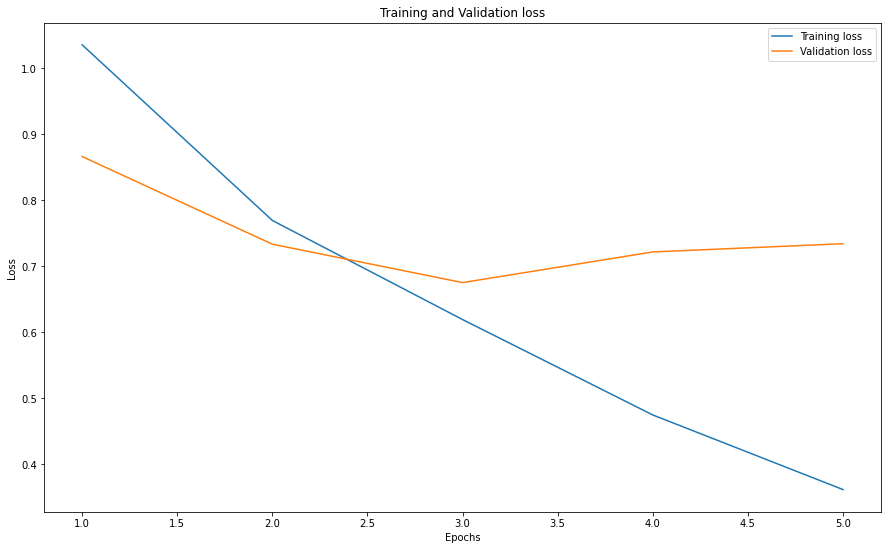

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()